<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>PART 1: BASIC TO ADVANCED DATA PREPARATION TECHNIQUES</h2>
</div>

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>PART 2: AI-POWERED DATA PREPARTION</h2>
</div>

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>PART 1</h2>
</div>

Data preparation or cleaning is the process of transforming raw data so that data scientists and analysts can use it uncover insights or make predictions. This stage consumes up to 80% of time in data science tasks. Data that is not patiently processed can greatly compromise data insights and model ouputs and even cause business failure or loss of lives in healthcare tasks.

NOTE: I will be swapping data in this class because i want to demo with different data with quality issues.

In [1]:
#Import some initial libraries
import pandas as pd #for data manipulation
import numpy as np  #for numeric computations
import matplotlib.pyplot as plt #for graphs

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Quantifying Missing Data</h2>
</div>

In [3]:
#Define few features to load from our dataset into a pandas dataframe (I only want to demo with a few features)
# (this step is not compulsory)
cols = ['AGE', 'NUMCHLD', 'INCOME', 'WEALTH1', 'MBCRAFT', 'MBGARDEN', 'MBBOOKS', 'MBCOLECT', 'MAGFAML','MAGFEM', 'MAGMALE']

In [5]:
import pandas as pd
data = pd.read_csv('cup98LRN.txt', usecols=cols)
data.head()

,AGE,NUMCHLD,INCOME,WEALTH1,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE
0,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,46.0,1.0,6.0,9.0,0.0,0.0,3.0,1.0,1.0,1.0,0.0
2,NaN,NaN,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,70.0,NaN,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,78.0,1.0,3.0,2.0,1.0,0.0,9.0,0.0,4.0,1.0,0.0


In [36]:
#Check for data size
data.shape

(95412, 11)

In [37]:
#Check for data completeness
data.isnull().sum()

AGE         23665
NUMCHLD     83026
INCOME      21286
WEALTH1     44732
MBCRAFT     52854
MBGARDEN    52854
MBBOOKS     52854
MBCOLECT    52914
MAGFAML     52854
MAGFEM      52854
MAGMALE     52854
dtype: int64

In [38]:
#Let's quantify the percentage of missing values in each variable:
data.isnull().mean()*100

AGE         24.802960
NUMCHLD     87.018404
INCOME      22.309563
WEALTH1     46.882992
MBCRAFT     55.395548
MBGARDEN    55.395548
MBBOOKS     55.395548
MBCOLECT    55.458433
MAGFAML     55.395548
MAGFEM      55.395548
MAGMALE     55.395548
dtype: float64

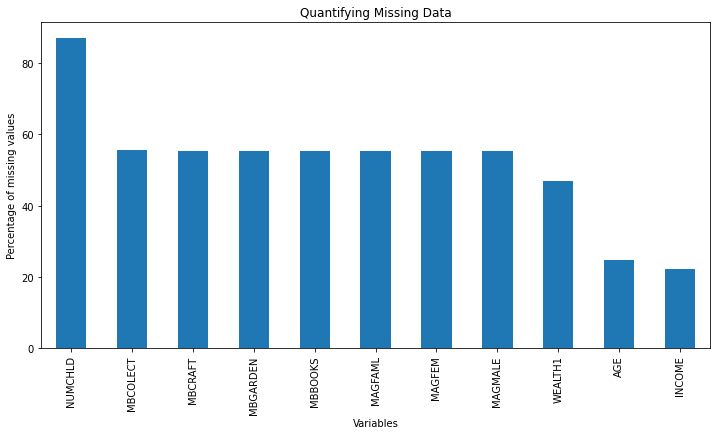

In [39]:
# Calculate the percentage of missing values per variable
missing_percentages = data.isnull().mean() * 100

# Sort the percentages in descending order
missing_percentages_sorted = missing_percentages.sort_values(ascending=False)

# Plot the sorted percentages as a bar plot
plt.figure(figsize=(12, 6))
missing_percentages_sorted.plot.bar()
plt.ylabel('Percentage of missing values')
plt.xlabel('Variables')
plt.title('Quantifying Missing Data')
plt.show()

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Handling Missing Data</h2>
</div>

**Remove Missing Data:**

1. Row-wise Deletion: In a clinical trial dataset, if a few patients have missing values for key variables such as blood pressure or cholesterol levels, and the proportion is small, these rows can be removed to avoid bias in the analysis.

2. Column-wise Deletion: In a survey dataset, if a particular question has a very high non-response rate (e.g., income), this column might be dropped from the analysis.

**Imputation:**

1. Mean/Median/Mode Imputation: In a housing dataset, if the number of bathrooms is missing for some houses, you might replace the missing values with the mean or median number of bathrooms in the dataset.

2. Forward Fill/Backward Fill: In stock market data, if some daily stock prices are missing, forward fill can be used to carry forward the last known price.

3. Interpolation: In weather data, if temperature readings are missing for certain hours, linear interpolation can estimate the missing temperatures based on known values.

**Model-Based Imputation**

1. Regression Imputation: In a health dataset, if the weight of some individuals is missing, a regression model can predict weight based on other variables like height, age, and gender.

2. K-Nearest Neighbors (KNN) Imputation: In a retail dataset, if some purchase amounts are missing, KNN can impute these values based on the nearest neighbors' purchasing patterns.


**Advanced Techniques:**

1. Multiple Imputation: In socioeconomic surveys, multiple imputation can be used to account for missing income data, creating several imputed datasets to reflect the uncertainty.

2. Machine Learning Models: In a customer relationship management (CRM) system, a Random Forest model can predict missing customer attributes like annual spending based on other known attributes.


**Handling Categorical Data:**

1. Most Frequent: In a survey on educational background, if the degree type is missing for some respondents, you can fill in the missing values with the most common degree type in the dataset.

2. Create a New Category: In a demographic survey, if marital status is missing for some individuals, a new category labeled "Unknown" or "Missing" can be introduced.

**Using External Data:**

Augment Data: In a real estate dataset, if some property attributes are missing (like school ratings), external databases or public records can be used to fill in these gaps.

**Indicator for Missing Data:**

Create Missing Indicator: In a credit scoring model, if income data is missing for some applicants, a binary indicator can be created to flag these cases, which might be relevant for risk assessment.

**Assessing Missingness Mechanism:**

1. Missing Completely at Random (MCAR): MCAR (Missing Completely At Random) means that the reason a value is missing has nothing to do with the data itself. For example, a survey respondent skips a question randomly, not because of their age, income, etc. Simple imputation methods like mean, median, or mode imputation can be used.

2. Missing at Random (MAR): Suppose you are collecting data on income and education level. Some people don't report their income.If low education level is associated with not reporting income, then income is missing at random (MAR). Because the missingness in income is related to education (another observed variable), but not to the income itself.In this case, use Regression Imputation to impute missing values. For instance, a linear regression model can predict missing values based on other available data.

3. Missing Not at Random (MNAR).This means that the reason a value is missing is related to the missing value itself. Missingness depends on the missing value itself (MNAR is the hardest to handle). In a survey for example, people with high income are more likely to not report their income, this means the missingness in "income" depends on the actual (missing) income value.

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Handling MCAR</h2>
</div>

In [40]:
# Mean Imputation: This method replaces the missing values in each column with the mean (average) of that column.
# For example, if AGE is missing in a row, it will be replaced with the average of the AGE column.

# Create a copy of the DataFrame to avoid changing the original one
df_mean_impute = data.copy()

# Use the fillna() method to replace missing values with the mean of each column
df_mean_impute.fillna(df_mean_impute.mean(), inplace=True)

# Print the result
print("Mean Imputation:\n", df_mean_impute)

Mean Imputation:
              AGE   NUMCHLD    INCOME   WEALTH1   MBCRAFT  MBGARDEN   MBBOOKS  \
0      60.000000  1.527773  3.886248  5.345699  0.152075  0.059166  1.116382   
1      46.000000  1.000000  6.000000  9.000000  0.000000  0.000000  3.000000   
2      61.611649  1.527773  3.000000  1.000000  0.000000  0.000000  1.000000   
3      70.000000  1.527773  1.000000  4.000000  0.000000  0.000000  0.000000   
4      78.000000  1.000000  3.000000  2.000000  1.000000  0.000000  9.000000   
...          ...       ...       ...       ...       ...       ...       ...   
95407  61.611649  1.527773  3.886248  5.345699  0.152075  0.059166  1.116382   
95408  48.000000  1.000000  7.000000  9.000000  0.000000  0.000000  1.000000   
95409  60.000000  1.527773  3.886248  5.345699  0.152075  0.059166  1.116382   
95410  58.000000  1.527773  7.000000  5.345699  0.152075  0.059166  1.116382   
95411  80.000000  1.527773  5.000000  8.000000  0.000000  0.000000  0.000000   

       MBCOLECT   MAG

In [41]:
# Median Imputation: Similar to mean imputation, but instead of the mean, the missing values are filled with the median.
# The median is the middle value when the data is sorted (it is less sensitive to outliers than the mean).

df_median_impute = data.copy()  # Create a copy of the DataFrame

# Use the fillna() method to replace missing values with the median of each column
df_median_impute.fillna(df_median_impute.median(), inplace=True)

# Print the result
print("\nMedian Imputation:\n", df_median_impute)


Median Imputation:
         AGE  NUMCHLD  INCOME  WEALTH1  MBCRAFT  MBGARDEN  MBBOOKS  MBCOLECT  \
0      60.0      1.0     4.0      6.0      0.0       0.0      0.0       0.0   
1      46.0      1.0     6.0      9.0      0.0       0.0      3.0       1.0   
2      62.0      1.0     3.0      1.0      0.0       0.0      1.0       0.0   
3      70.0      1.0     1.0      4.0      0.0       0.0      0.0       0.0   
4      78.0      1.0     3.0      2.0      1.0       0.0      9.0       0.0   
...     ...      ...     ...      ...      ...       ...      ...       ...   
95407  62.0      1.0     4.0      6.0      0.0       0.0      0.0       0.0   
95408  48.0      1.0     7.0      9.0      0.0       0.0      1.0       0.0   
95409  60.0      1.0     4.0      6.0      0.0       0.0      0.0       0.0   
95410  58.0      1.0     7.0      6.0      0.0       0.0      0.0       0.0   
95411  80.0      1.0     5.0      8.0      0.0       0.0      0.0       0.0   

       MAGFAML  MAGFEM  MAGMAL

In [42]:
# Mode Imputation: This method replaces missing values with the mode, which is the most frequently occurring value in the column.
# For example, if most of the values in the NUMCHLD column are '0', missing values will be replaced with '0'.

df_mode_impute = data.copy()  # Create a copy of the DataFrame

# Loop through each column and fill missing values with the mode (most frequent value) of the column
for column in data.columns:
    # The mode() method returns the most frequent value (if there are multiple modes, it takes the first one)
    df_mode_impute[column].fillna(df_mode_impute[column].mode()[0], inplace=True)

# Print the result
print("\nMode Imputation:\n", df_mode_impute)


Mode Imputation:
         AGE  NUMCHLD  INCOME  WEALTH1  MBCRAFT  MBGARDEN  MBBOOKS  MBCOLECT  \
0      60.0      1.0     5.0      9.0      0.0       0.0      0.0       0.0   
1      46.0      1.0     6.0      9.0      0.0       0.0      3.0       1.0   
2      50.0      1.0     3.0      1.0      0.0       0.0      1.0       0.0   
3      70.0      1.0     1.0      4.0      0.0       0.0      0.0       0.0   
4      78.0      1.0     3.0      2.0      1.0       0.0      9.0       0.0   
...     ...      ...     ...      ...      ...       ...      ...       ...   
95407  50.0      1.0     5.0      9.0      0.0       0.0      0.0       0.0   
95408  48.0      1.0     7.0      9.0      0.0       0.0      1.0       0.0   
95409  60.0      1.0     5.0      9.0      0.0       0.0      0.0       0.0   
95410  58.0      1.0     7.0      9.0      0.0       0.0      0.0       0.0   
95411  80.0      1.0     5.0      8.0      0.0       0.0      0.0       0.0   

       MAGFAML  MAGFEM  MAGMALE 

In [43]:
# Forward Fill Imputation: This method replaces missing values by carrying forward the previous valid value (the value that is not missing).
# For example, if the value in a column is missing in row 2, it will be replaced with the value from row 1.

df_ffill = data.copy()  # Create a copy of the DataFrame

# The fillna() method with 'ffill' as the method argument will carry forward the last valid value
df_ffill.fillna(method='ffill', inplace=True)

# Print the result
print("\nForward Fill Imputation:\n", df_ffill)



Forward Fill Imputation:
         AGE  NUMCHLD  INCOME  WEALTH1  MBCRAFT  MBGARDEN  MBBOOKS  MBCOLECT  \
0      60.0      NaN     NaN      NaN      NaN       NaN      NaN       NaN   
1      46.0      1.0     6.0      9.0      0.0       0.0      3.0       1.0   
2      46.0      1.0     3.0      1.0      0.0       0.0      1.0       0.0   
3      70.0      1.0     1.0      4.0      0.0       0.0      0.0       0.0   
4      78.0      1.0     3.0      2.0      1.0       0.0      9.0       0.0   
...     ...      ...     ...      ...      ...       ...      ...       ...   
95407  50.0      1.0     6.0      6.0      0.0       0.0      1.0       0.0   
95408  48.0      1.0     7.0      9.0      0.0       0.0      1.0       0.0   
95409  60.0      1.0     7.0      9.0      0.0       0.0      1.0       0.0   
95410  58.0      1.0     7.0      9.0      0.0       0.0      1.0       0.0   
95411  80.0      1.0     5.0      8.0      0.0       0.0      0.0       0.0   

       MAGFAML  MAGFEM  

In [44]:
# Backward Fill Imputation: This method is the opposite of forward fill.
# It replaces missing values with the next valid value (the value that comes after the missing value).

df_bfill = data.copy()  # Create a copy of the DataFrame

# The fillna() method with 'bfill' as the method argument will replace missing values with the next valid value
df_bfill.fillna(method='bfill', inplace=True)

# Print the result
print("\nBackward Fill Imputation:\n", df_bfill)


Backward Fill Imputation:
         AGE  NUMCHLD  INCOME  WEALTH1  MBCRAFT  MBGARDEN  MBBOOKS  MBCOLECT  \
0      60.0      1.0     6.0      9.0      0.0       0.0      3.0       1.0   
1      46.0      1.0     6.0      9.0      0.0       0.0      3.0       1.0   
2      70.0      1.0     3.0      1.0      0.0       0.0      1.0       0.0   
3      70.0      1.0     1.0      4.0      0.0       0.0      0.0       0.0   
4      78.0      1.0     3.0      2.0      1.0       0.0      9.0       0.0   
...     ...      ...     ...      ...      ...       ...      ...       ...   
95407  48.0      1.0     7.0      9.0      0.0       0.0      1.0       0.0   
95408  48.0      1.0     7.0      9.0      0.0       0.0      1.0       0.0   
95409  60.0      NaN     7.0      8.0      0.0       0.0      0.0       0.0   
95410  58.0      NaN     7.0      8.0      0.0       0.0      0.0       0.0   
95411  80.0      NaN     5.0      8.0      0.0       0.0      0.0       0.0   

       MAGFAML  MAGFEM 

In [45]:
# Linear Interpolation Imputation: This method fills missing values by interpolating linearly between known values.
# If there are two known values around the missing value, it calculates a linear (straight-line) path between them and fills the missing value.

df_interp = data.copy()  # Create a copy of the DataFrame

# Use the interpolate() method to fill missing values with linear interpolation
df_interp.interpolate(method='linear', inplace=True)

# Print the result
print("\nLinear Interpolation Imputation:\n", df_interp)


Linear Interpolation Imputation:
         AGE  NUMCHLD  INCOME   WEALTH1  MBCRAFT  MBGARDEN   MBBOOKS  MBCOLECT  \
0      60.0      NaN     NaN       NaN      NaN       NaN       NaN       NaN   
1      46.0      1.0     6.0  9.000000      0.0       0.0  3.000000       1.0   
2      58.0      1.0     3.0  1.000000      0.0       0.0  1.000000       0.0   
3      70.0      1.0     1.0  4.000000      0.0       0.0  0.000000       0.0   
4      78.0      1.0     3.0  2.000000      1.0       0.0  9.000000       0.0   
...     ...      ...     ...       ...      ...       ...       ...       ...   
95407  49.0      1.0     6.5  7.500000      0.0       0.0  1.000000       0.0   
95408  48.0      1.0     7.0  9.000000      0.0       0.0  1.000000       0.0   
95409  60.0      1.0     7.0  8.666667      0.0       0.0  0.666667       0.0   
95410  58.0      1.0     7.0  8.333333      0.0       0.0  0.333333       0.0   
95411  80.0      1.0     5.0  8.000000      0.0       0.0  0.000000       

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Handling MAR</h2>
</div>

In [46]:
# For MAR, we use model-based approaches like regression
# Example: Predict missing INCOME based on AGE and NUMCHLD

from sklearn.linear_model import LinearRegression
import pandas as pd

# Drop rows where 'INCOME' is not missing, to train model
train = data[data['INCOME'].notna()]

# Retain rows where 'INCOME' is missing, to test model
test = data[data['INCOME'].isna()]

# Prepare training data
# AGE and NUMCHLD must be available to train model to predict missing income, so drop rows where AGE or NUMCHLD is missing.
X_train = train[['AGE', 'NUMCHLD']].dropna()
y_train = train.loc[X_train.index, 'INCOME']

# Train Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict INCOME for missing rows if AGE and NUMCHLD are available
# # AGE and NUMCHLD must be available to predict missing income, so drop rows where AGE or NUMCHLD is missing.
X_test = test[['AGE', 'NUMCHLD']].dropna()
income_preds = model.predict(X_test)

# Fill predicted values back
data.loc[X_test.index, 'INCOME'] = income_preds

In [47]:
# Drop rows where 'INCOME' is not missing, to train model
train = data[data['INCOME'].notna()]

# Retain rows where 'INCOME' is missing, to test model
test = data[data['INCOME'].isna()]

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Handling MNAR</h2>
</div>

You CAN'T “fix” MNAR purely from your existing data
Why? Because the reason the data is missing depends on the value itself, which you don't have. So we need extra help.

Scenerio: In a survey for example, people with high income are more likely to not report their income, this means the missingness in "income" depends on the actual (missing) income value.

| ID | Income  | Age |
|----|---------|-----|
| 1  | 80,000  | 30  |
| 2  | NaN     | 35  |
| 3  | NaN     | 40  |
| 4  | 50,000  | 28  |
| 5  | 95,000  | 32  |

# Sometimes the only real fix is:

- Go back and ask the missing respondents (if possible)

- Try to get external data from other sources

- Redesign surveys to make questions less sensitive

- Use sensitive analysis e.g Try filling in missing income with: a low guess, a high guess, average of observed, then compare the regression results in each case

This moves your data closer to MAR, which is much easier to deal with.

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>INAPPROPRIATE WAY OF HANDLING MNAR</h2>
</div>

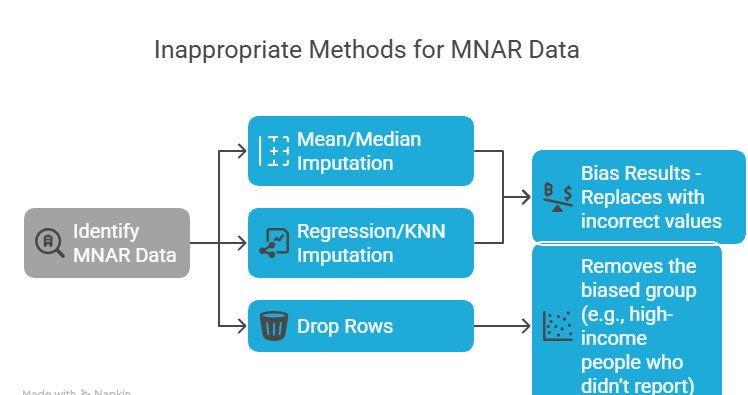

In [48]:
from IPython.display import Image
Image(filename='What NOT to do with MNAR - visual selection.jpg')

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>RECAP ON MISSINGNESS</h2>
</div>

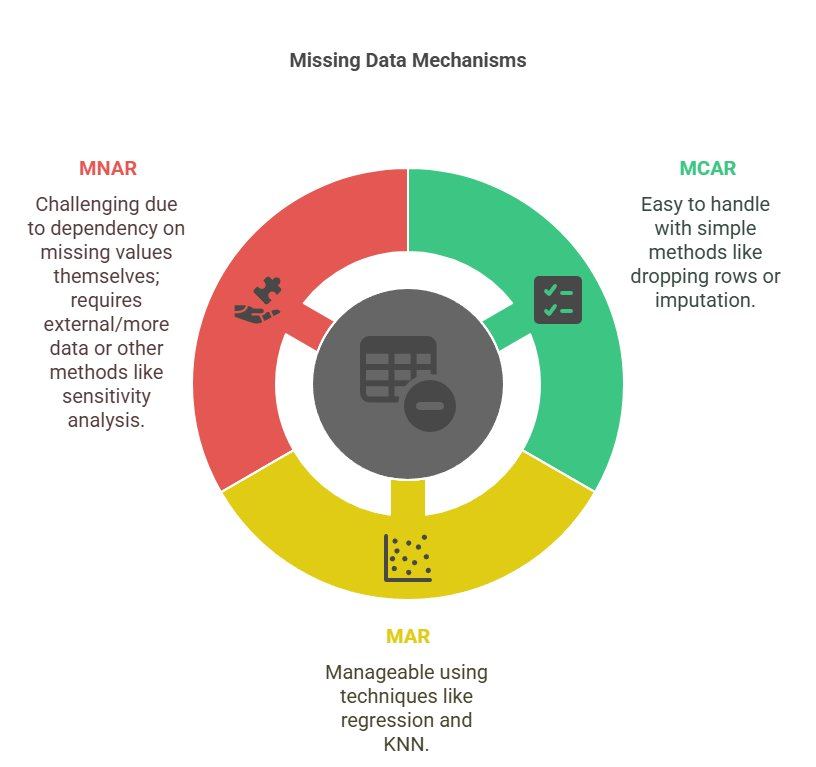

In [49]:
from IPython.display import Image
Image(filename='Recap of Missing Data Mechanisms.jpg')

FINAL NOTE: Always try to assess whether your missing data is MCAR, MAR, or MNAR before choosing an imputation method.

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Investigating Cardinality of Categorical Variables</h2>
</div>

In [50]:
#Let's load a few categorical variables from the dataset:
cols = ['GENDER', 'RFA_2', 'MDMAUD_A', 'RFA_2', 'DOMAIN', 'RFA_15']
data2 = pd.read_csv('cup98LRN.txt', usecols=cols)

In [51]:
data2.tail(100)

,DOMAIN,GENDER,RFA_2,RFA_15,MDMAUD_A
95312,S2,M,L1F,,X
95313,S2,F,L1F,,X
95314,R2,F,L2F,A4E,X
95315,T2,F,L4E,A4E,X
95316,S1,F,L1G,,X
...,...,...,...,...,...
95407,C2,M,L1G,,X
95408,C1,M,L1F,,X
95409,C3,M,L3E,N2E,X
95410,C1,F,L4F,S4F,X


In [52]:
#Let's replace the empty strings with NaN values and inspect the first five rows of the data:
data2 = data2.replace(' ', np.nan)
data2.head(6)

,DOMAIN,GENDER,RFA_2,RFA_15,MDMAUD_A
0,T2,F,L4E,S4E,X
1,S1,M,L2G,NaN,X
2,R2,M,L4E,S4F,X
3,R2,F,L4E,S4E,X
4,S2,F,L2F,NaN,X
5,T2,NaN,L1F,A2F,X


In [53]:
#Now, let's determine the number of unique categories in each variable:
data2.nunique()

DOMAIN      16
GENDER       6
RFA_2       14
RFA_15      33
MDMAUD_A     5
dtype: int64

In [54]:
#Now, let's print out the unique categories of the GENDER variable:
data2['GENDER'].unique()

array(['F', 'M', nan, 'C', 'U', 'J', 'A'], dtype=object)

Text(0.5, 1.0, 'Cardinality')

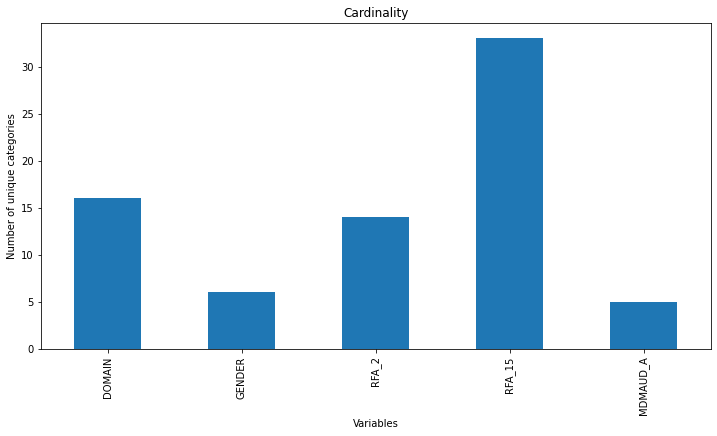

In [55]:
#Let's make a plot with the cardinality of each variable:
data2.nunique().plot.bar(figsize=(12,6))
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Identifying Rare Categories</h2>
</div>

In [8]:
#Let's load the Car Evaluation dataset, add the column names, and display the first five rows:
data3 = pd.read_csv('car.data',header=None)
data3.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
data3.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [9]:
#Let's display the unique categories of the variable class:
data3['class'].unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [10]:
#Let's calculate the number of cars per category of the class variable and 
#then divide them by the total number of cars in the dataset to obtain the percentage of cars per category. 
#Then, we will print the result:

#Percentage of cars per category expressed as decimals:

label_freq = data3['class'].value_counts() / len(data3)
print(label_freq)

class
unacc    0.700231
acc      0.222222
good     0.039931
vgood    0.037616
Name: count, dtype: float64


Text(0.5, 1.0, 'Identifying Rare Categories')

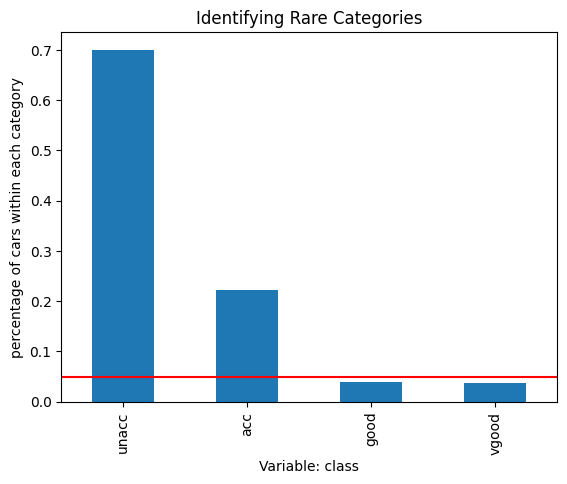

In [11]:
#Let's make a bar plot showing the frequency of each category 
#and highlight the 5% mark with a red line:

fig = label_freq.sort_values(ascending=False).plot.bar()
fig.axhline(y=0.05, color='red')
fig.set_ylabel('percentage of cars within each category')
fig.set_xlabel('Variable: class')
fig.set_title('Identifying Rare Categories')

The good and vgood categories are present in less than 5% of cars, as indicated by the red line in the preceding plot.
we added a horizontal red line at the height of 0.05 to indicate the 5% percentage limit, under which we considered a category as rare.

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Balancing your Data (Only for Categorical Target)</h2>
</div>

Imbalanced data refers to a situation where the distribution of classes in the target variable is uneven, with one class being more prevalent than the others. Imbalanced data can pose several challenges and problems in machine learning:

Biased Model: When the data is imbalanced, a predictive model tends to be biased towards the majority class. This can lead to poor performance in predicting the minority class, as the model may not have enough examples to learn from.

Accuracy Paradox: Accuracy alone is not a reliable metric for evaluating models on imbalanced data. Even a naive model that always predicts the majority class can achieve high accuracy due to the class imbalance. This can be misleading, as the model may fail to detect the minority class instances, which are often the ones of greater interest.

Poor Generalization: Imbalanced data can lead to poor generalization of a model. The model might struggle to capture the underlying patterns and make accurate predictions for new, unseen data.

Difficulty in Learning Minority Class: The scarcity of samples in the minority class can make it challenging for the model to learn its characteristics effectively. It may result in a higher rate of false negatives (Type II errors) where the minority class instances are misclassified as the majority class.

In [60]:
#Import additional libraries
from sklearn.compose import ColumnTransformer  # Allows applying different transformations to different columns in a dataset.
from sklearn.pipeline import Pipeline  # Chains together multiple transformers into one, allowing for streamlined data processing.
from sklearn.impute import SimpleImputer  # Handles missing values by filling them in with a specified strategy.
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # StandardScaler scales numerical features, OneHotEncoder encodes categorical features.
from sklearn.feature_selection import SelectPercentile, chi2  # SelectPercentile selects the top features based on a percentile of the highest scores, chi2 performs chi-squared statistical test for feature selection.

In [61]:
#I will get a subset of the data to save my time (for class reason)
col = ["age","sex","on thyroxine","query on thyroxine","on antithyroid medication","sick","pregnant","thyroid surgery","binaryClass"]

In [62]:
df_th=pd.read_csv('hypothyroid.csv',usecols=col)
df_th.head(20)

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,binaryClass
0,41,F,f,f,f,f,f,f,P
1,23,F,f,f,f,f,f,f,P
2,46,M,f,f,f,f,f,f,P
3,70,F,t,f,f,f,f,f,P
4,70,F,f,f,f,f,f,f,P
5,18,F,t,f,f,f,f,f,P
6,59,F,f,f,f,f,f,f,P
7,80,F,f,f,f,f,f,f,P
8,66,F,f,f,f,f,f,f,P
9,68,M,f,f,f,f,f,f,P


In [63]:
#Check for unique categories for the target column
df_th.binaryClass.unique()

array(['P', 'N'], dtype=object)

In [64]:
# Define mapping for the target column
binary_to_numeric = {'P': 0, 'N': 1}

# Apply mapping to target column and drop original target column
df_th['diagnosis'] = df_th['binaryClass'].map(binary_to_numeric)
df_th = df_th.drop('binaryClass', axis=1)

# Print result
df_th

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,diagnosis
0,41,F,f,f,f,f,f,f,0
1,23,F,f,f,f,f,f,f,0
2,46,M,f,f,f,f,f,f,0
3,70,F,t,f,f,f,f,f,0
4,70,F,f,f,f,f,f,f,0
...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,f,f,0
3768,68,F,f,f,f,f,f,f,0
3769,74,F,f,f,f,f,f,f,0
3770,72,M,f,f,f,f,f,f,0


In [65]:
df_th.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on thyroxine               3772 non-null   object
 3   query on thyroxine         3772 non-null   object
 4   on antithyroid medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid surgery            3772 non-null   object
 8   diagnosis                  3772 non-null   int64 
dtypes: int64(1), object(8)
memory usage: 265.3+ KB


In [67]:
# Convert age column to int (This will result into Error, due to the presence of strange character)
df_th['age'] = df_th['age'].astype(int)

ValueError: invalid literal for int() with base 10: '?'

We use the str.contains() method to check if the character '?' is present in the age column, which returns a Boolean series. We can then use this Boolean series to select the rows in the age column where '?' is present using boolean indexing. The resulting data frame will only contain the rows where '?' is present in the 'age' column.

In [66]:
# Check if '?' is present in the age column
contains = df_th['age'].str.contains('\?')

# Print rows where '?' is present in column
df_th[contains]

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,diagnosis
1985,?,F,t,f,f,f,f,f,0


In [68]:
# Replace '?' with a default value
df_th['age'] = df_th['age'].replace('?', '0')

In [69]:
# Check if '?' is present in the age column
contains = df_th['age'].str.contains('\?')

# Print rows where '?' is present in column
df_th[contains]

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,diagnosis


In [70]:
# Re-Convert age column to int
df_th['age'] = df_th['age'].astype(int)

In [71]:
df_th.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   int32 
 1   sex                        3772 non-null   object
 2   on thyroxine               3772 non-null   object
 3   query on thyroxine         3772 non-null   object
 4   on antithyroid medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid surgery            3772 non-null   object
 8   diagnosis                  3772 non-null   int64 
dtypes: int32(1), int64(1), object(7)
memory usage: 250.6+ KB


## We need to Split our Data to Perform Balancing

Training Data Resampling: Resampling are applied to the training data to address class imbalance. This generates synthetic samples for the minority class (or classes) to balance the distribution of classes in the training set.

Test Data Resampling: When evaluating a model, the test set should remain a faithful representation of real-world, unseen data. Introducing synthetic samples into the test set would violate this principle, as the model would effectively be tested on data it has already been exposed to leading to an overly optimistic assessment of its generalization ability.

## Feature - Target Split

In [72]:
df_th

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,diagnosis
0,41,F,f,f,f,f,f,f,0
1,23,F,f,f,f,f,f,f,0
2,46,M,f,f,f,f,f,f,0
3,70,F,t,f,f,f,f,f,0
4,70,F,f,f,f,f,f,f,0
...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,f,f,0
3768,68,F,f,f,f,f,f,f,0
3769,74,F,f,f,f,f,f,f,0
3770,72,M,f,f,f,f,f,f,0


In [74]:
#Split Data
X = df_th.drop("diagnosis", axis=1)
y = df_th["diagnosis"]

In [75]:
X

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery
0,41,F,f,f,f,f,f,f
1,23,F,f,f,f,f,f,f
2,46,M,f,f,f,f,f,f
3,70,F,t,f,f,f,f,f
4,70,F,f,f,f,f,f,f
...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,f,f
3768,68,F,f,f,f,f,f,f
3769,74,F,f,f,f,f,f,f
3770,72,M,f,f,f,f,f,f


In [76]:
y

0       0
1       0
2       0
3       0
4       0
       ..
3767    0
3768    0
3769    0
3770    0
3771    0
Name: diagnosis, Length: 3772, dtype: int64

In [77]:
print(X.shape )

(3772, 8)


In [78]:
print(y.shape )

(3772,)


## Train - Test Split

In [79]:
# Importing a function to split the dataset into training and testing subsets
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets.
# X_train and y_train are the features and target labels for the training set.
# X_test and y_test are the features and target labels for the testing set.
# The test_size parameter specifies the proportion of the dataset to include in the testing set (here, 20%).
# The random_state parameter ensures reproducibility by fixing the random seed for splitting.
# The stratify parameter ensures that the class distribution is maintained in both training and testing sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Printing out the dimensions of the training and testing sets, 
# along with the occurrences of the target class (0 and 1) in the training and testing labels.
print(X_train.shape, X_test.shape, sum(y_train==0), sum(y_test==1))


(3017, 8) (755, 8) 2784 58


In [80]:
X_train

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery
2421,25,F,f,f,f,f,f,f
3308,40,F,f,f,f,f,f,f
1473,59,M,f,f,f,f,f,f
2939,53,F,f,f,f,f,f,f
453,68,M,f,f,f,f,f,f
...,...,...,...,...,...,...,...,...
1935,28,F,f,f,f,f,f,f
1689,49,F,f,f,f,f,f,f
161,19,F,f,f,t,f,f,f
894,62,F,f,f,f,f,f,f


In [81]:
X_test

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery
111,57,M,f,f,f,f,f,f
702,44,M,f,f,f,f,f,f
3249,28,M,f,f,f,f,f,f
3685,17,F,f,f,f,f,f,f
1391,50,F,f,f,f,f,f,f
...,...,...,...,...,...,...,...,...
3222,58,M,t,f,f,f,f,f
827,29,M,f,f,f,f,f,f
3150,32,F,f,f,f,f,f,f
2148,66,F,f,f,f,f,f,f


In [82]:
y_train

2421    0
3308    0
1473    1
2939    0
453     0
       ..
1935    0
1689    0
161     0
894     0
3641    0
Name: diagnosis, Length: 3017, dtype: int64

In [83]:
y_test

111     0
702     0
3249    0
3685    0
1391    0
       ..
3222    0
827     0
3150    0
2148    0
1072    0
Name: diagnosis, Length: 755, dtype: int64

 ## Estimate of Target (diagnosis) Distributions 

In [84]:
# Figure out the diagnosis class distribution percentage and round it to 3 decimal places

print('Percentage of inliers is {} %'.format(
    round(df_th["diagnosis"].value_counts()[0]/len(df_th) * 100,3)))

print('Percentage of outliers is {} %'.format(
    round(df_th["diagnosis"].value_counts()[1]/len(df_th) * 100,3)))

Percentage of inliers is 92.285 %
Percentage of outliers is 7.715 %


diagnosis
0    3481
1     291
Name: count, dtype: int64

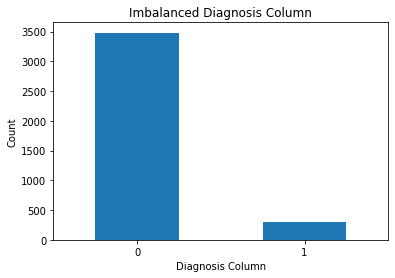

In [85]:
#Check target class distributions for the whole dataset
plt.figure(figsize=(6,4))
pd.value_counts(df_th["diagnosis"]).plot.bar()
plt.title('Imbalanced Diagnosis Column')
plt.xlabel("Diagnosis Column")
plt.ylabel("Count")
plt.xticks(rotation=0)
df_th["diagnosis"].value_counts()

The minority class here ("1"- Negative diagnosis) are the anomalies.

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Use SMOTE Technique to Upsample the Minority Class</h2>
</div>

Training Data Resampling: Resampling techniques like SMOTE are applied to the training data to address class imbalance. This generates synthetic samples for the minority class (or classes) to balance the distribution of classes in the training set.

Test Data Resampling: Resampling the test data would introduce synthetic samples that the model hasn't seen during training. This can lead to overly optimistic evaluation metrics, as the model would be tested on data it has already seen before.

SMOTE stands for Synthetic Minority Over-sampling Technique and was presented in a 2002 paper here https://jair.org/index.php/jair/article/view/10302/24590

Use SMOTE to improve the performance of the models.

Anomaly-detection problems are by definition problems of imbalanced classes. A way to fix imbalanced classes is through oversampling the minority class so that the class distribution becomes 50:50. The goal of this milestone is to use the SMOTE algorithm in the imbalanced-learn library to generate synthetic examples of the minority class.

The goal here is to rebalance the minority class (i.e. the anomalies) in the dataset in order to better allow our future machine learning model to predict without been skewed. Oversampling through SMOTE is one way to do this. The reason is that data can be highly imbalanced.

## It is good practice to process and scale your data before balancing

## Implement Column Transformer with Mixed Data Types

This example illustrates how to apply different preprocessing and feature extraction pipelines to different subsets of features, using ColumnTransformer. This is particularly handy for the case of datasets that contain heterogeneous data types, since we may want to scale the numeric features and one-hot encode the categorical ones.

In this example, the numeric data is standard-scaled after mean-imputation. The categorical data is one-hot encoded via OneHotEncoder and we further reduce the dimensionality by selecting categories using a chi-squared test.

In [86]:
numeric_features = ["age"]
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="mean")), ("scaler", StandardScaler())]
)

categorical_features = ["sex","on thyroxine","query on thyroxine","on antithyroid medication","sick","pregnant","thyroid surgery"]
categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore")),
        ("selector", SelectPercentile(chi2, percentile=50)),
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),])

In [87]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['age']),
                                ('cat',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(handle_unknown='ignore')),
                                                 ('selector',
                                                  SelectPercentile(percentile=50,
                                                                   score_func=<function chi2 at 0x00000227644CAAF0>))]),
                                 ['sex', 'on thyroxine', 'query on thyroxine',
                                  'on antithyroid medication', 'sick',
                                  'pregnant', 'thyroid surgery'])])

Note: The chi-square test evaluates the independence between each feature and the target variable. It calculates the chi-square statistic and p-value to determine the strength of the relationship between the feature and the target.

When you set percentile=50, it indicates that you want to select features that fall within the top 50% of the distribution of chi-square scores.

In [88]:
# Next, we need to fit the preprocessor to the X_train and y_train so that 
# the scaling and imputation parameters are learned:

clf = Pipeline(
    steps=[("preprocessor", preprocessor)]
)

clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('selector',
                                                                   SelectPercentile(percentile=50,
                                                                                    score_func=<function chi2 at 0x00000227644CAAF0>))]),
                                                  ['sex', 'on thyroxine',
                                                   'query on thyroxine',
                                                   'on antithyroid medication',
                                                   'sick', 'pregnant',
                                                   'thyroid surgery'])]))])

In [90]:
# Then use the transformer processesor to transform X_train and X_test 
# (Whatever transformation is doen on the train data must aslo be done on the test data )
X_train_transformed = clf.transform(X_train)

In [91]:
X_train_transformed

array([[-1.32541104,  1.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.59019075,  1.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.34108828,  0.        ,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.61949915,  1.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.48813233,  1.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-1.4724551 ,  1.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [92]:
X_test_transformed = clf.transform(X_test)

In [93]:
print('Before resampling,diagnosis data had {} negative instance ratio'.format(
    float("{0:.3f}".format(( sum(y_train)/len(y_train) ) ) )))

from imblearn.over_sampling import SMOTE

# Generate the resampled data using one of the imblearn methods
# Make sure to use the scaled data because SMOTE relies on distance metrics to generate the synthetic samples
X_resampled_train, y_resampled_train = SMOTE(random_state = 1234).fit_sample(X_train_transformed, y_train)
# Make sure to NOT resample the test data! Otherwise the test metrics will be a poor proxy for generalization performance

print('The resampled diagnosis data now has {} negative instance ratio'.format(sum(y_resampled_train)/len(y_resampled_train)))
# Notice how the upsampled dataset has exactly twice as large as the number of minority positive class
# This is characteristic of SMOTE

Before resampling,diagnosis data had 0.077 negative instance ratio
The resampled diagnosis data now has 0.5 negative instance ratio


In [94]:
# The old data
X_train_transformed.shape

(3017, 8)

In [95]:
# The old data
y_train.shape

(3017,)

In [96]:
#Check for shape of the newly SMOTE resampled datasets
X_resampled_train.shape

(5568, 8)

In [97]:
 y_resampled_train.shape

(5568,)

In [86]:
y_resampled_train

0       0
1       0
2       1
3       0
4       0
       ..
5563    1
5564    1
5565    1
5566    1
5567    1
Name: diagnosis, Length: 5568, dtype: int64

In [98]:
df_y = pd.DataFrame(y_resampled_train.value_counts())

In [99]:
df_y

,count
diagnosis,
0,2784
1,2784


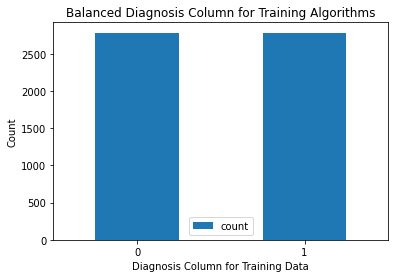

In [100]:
# Create a DataFrame from the "diagnosis" column
df_y = pd.DataFrame(y_resampled_train.value_counts())

# Plot the distribution using a bar chart
df_y.plot.bar(rot=0) #where rot=0 is used to keep the x-axis labels horizontal.

# Set the x-label, y-label, and title
plt.xlabel("Diagnosis Column for Training Data")
plt.ylabel("Count")
plt.title("Balanced Diagnosis Column for Training Algorithms")

# Show the plot
plt.show()

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Detecting Outliers with Inter Quartile Range</h2>
</div>

In [96]:
#Read in dataset
credit = pd.read_csv("german_credit_data.csv")

In [97]:
credit

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,40,male,3,own,little,little,3857,30,car
997,38,male,2,own,little,NaN,804,12,radio/TV
998,23,male,2,free,little,little,1845,45,radio/TV


In [71]:
# Let's Plot the whole variables using Boxplot
import seaborn as sns
plt.figure(figsize=(9,6)) # Set plot dimensions
sns.boxplot(data=credit)

AttributeError: 'DataFrame' object has no attribute 'iteritems'

<Figure size 648x432 with 0 Axes>

Credit amount have some outliers (extreme values)

<Axes: >

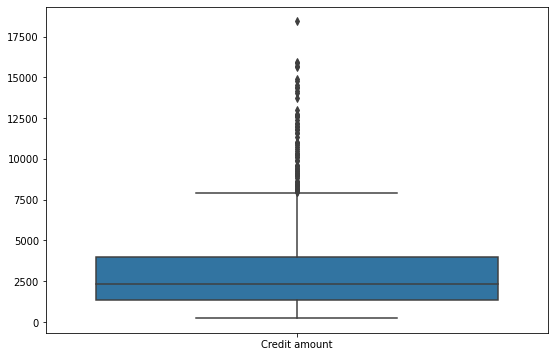

In [109]:
# Preprocess DataFrame to only investigate the "credit amount" properly
import seaborn as sns
pd.DataFrame.iteritems = pd.DataFrame.items

stats_age = credit[['Credit amount']]
 
# New boxplot using stats_df
plt.figure(figsize=(9,6)) # Set plot dimensions
sns.boxplot(data=stats_age)

Age have some outliers (extreme values or aged people). This may not be bad depending on your project context.

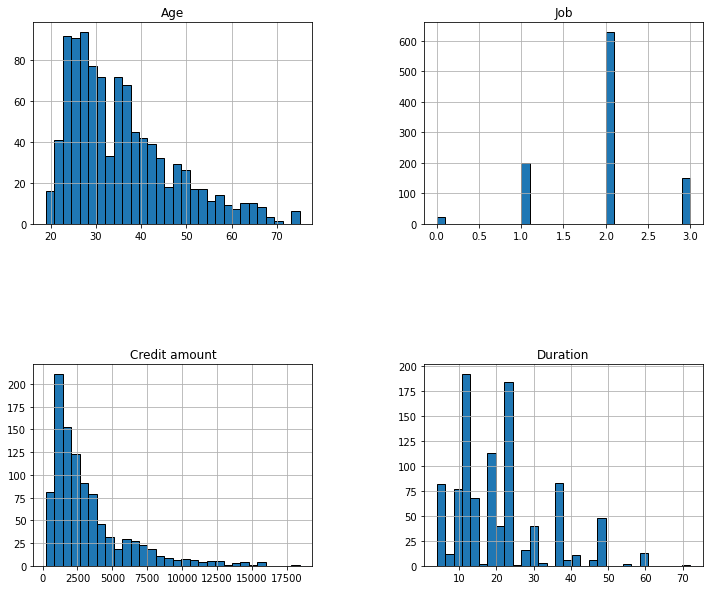

In [110]:
#Check the distribution of all variables
credit.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

We can just focus on features with wierd distribution

The credit amount distribution has a long tail. It means that the credit amount is less normally distributed because there are some people getting low credit amount.

The Age also have some high values.

Job is more or less uniform because the data looks categorical (within a defined range). 

The Duration is also more or less uniform (normally distributed).

We can look more at the statistics for these features:

In [ ]:
credit.describe()

For each of these features, comparing the max and 75% values, we can see a huge difference for "Credit Amount" signaling the presence of outliers in the Credit amount.

To find the outliers in a variable, we need to find the distribution boundaries according to the Interquartile Range (IQR) proximity rule.

## Understanding and Using the Interquartile Range (IQR)

An outlier is not always bad data! With the help of business understanding and client interaction, you can discern whether to remove or retain the outlier.

Let's learn how to find outliers using a simple example. Consider a sample dataset of temperatures from a place at different times:

71, 70, 90, 70, 70, 60, 70, 72, 72, 320, 71, 69

We can now do the following:

1. First, we'll sort the data:

60,69, 70, 70, 70, 70, 71, 71, 72, 72, 90, 320

2. Next, we'll calculate the median (Q2). The median is the middle data after sorting.

Here, the middle terms are 70 and 71 after sorting the list.

The median is (70 + 71) / 2 = 70.5

3. Then we'll calculate the lower quartile (Q1). Q1 is the middle value (median) of the first half of the dataset.

First half of the data = 60, 69, 70, 70, 70, 70

The average is (70 + 70) / 2 = 70
Q1 = 70

4. Then we calculate the upper quartile (Q3).

Q3 is the middle value (median) of the second half of the dataset.

Second half of the data = 71, 71, 72, 72, 90, 320

The average is (72 + 72) / 2 = 72

Q3 = 72

5. Then we find the interquartile range (IQR).

IQR = Q3 – Q1 = 72 – 70

IQR = 2

6. Next, we find the upper and lower fences.

Lower fence = Q1 – 1.5 (IQR) = 70 – 1.5(2) = 67

Upper fence = Q3 + 1.5 (IQR) = 71.5 + 1.5(2) = 74.5

Boundaries of our fences = 67 and 74.5

Any data points lower than the lower fence and greater than the upper fence are outliers. Thus, the outliers from our example are 60, 90 and 320.

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Outlier Removal</h2>
</div>

In [112]:
def find_boundaries(df, variable, distance):

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [113]:
#Calculate and then display the IQR proximity rule boundaries for the population variable:
#Values below or above the upper and lower boundary by 1.5
upper_boundary, lower_boundary = find_boundaries(credit, 'Credit amount', 1.5)
upper_boundary, lower_boundary

(7882.375, -2544.625)

In [114]:
#Now, we need to find the outliers in the dataframe.
#Create a boolean vector to flag observations outside the boundaries we determined:
outliers = np.where(credit['Credit amount'] > upper_boundary, True,
            np.where(credit['Credit amount'] < lower_boundary, True, False))

In [115]:
outliers

array([False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
        True, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [116]:
#Create a new dataframe with the outlier values and then display the top five rows:
outliers_df = credit.loc[outliers, 'Credit amount']
outliers_df.head(5)

5      9055
17     8072
18    12579
57     9566
63    14421
Name: Credit amount, dtype: int64

In [ ]:
credit_without_outliers = credit.loc[~outliers]

#In the code above, the ~ operator is used to negate the outliers boolean mask. 
#This selects all rows in the credit DataFrame except for the outlier rows.
#The resulting DataFrame, credit_without_outliers, contains the original data but with the outlier rows removed.

In [118]:
# With Presence of Outliers (Old Dataframe)
credit.shape

(1000, 9)

In [119]:
# With Outliers Removed (New Dataframe)
credit_without_outliers.shape

(928, 9)

Outliers in a DataFrame can introduce various challenges and potential dangers in data analysis and modeling. Here are some of the dangers associated with outliers:

Skewed Analysis: Outliers can significantly impact the summary statistics of a dataset, such as the mean and standard deviation. These summary statistics may no longer represent the central tendency and spread of the majority of the data, leading to a skewed analysis and potentially incorrect conclusions.

Biased Model: Outliers can influence the training of machine learning models by disproportionately affecting the model's parameters. This can result in biased predictions, as the model may give excessive weight or importance to the outliers and perform poorly on normal data instances.

Decreased Predictive Performance: Outliers can negatively impact the performance of predictive models. Models may overfit to outliers, leading to poor generalization and decreased accuracy when making predictions on unseen data.

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Imputing Missing Data</h2>
</div>

In [ ]:
#Load Dataset
data = pd.read_csv('creditApprovalUCI.csv')
data.head()

In [ ]:
#Let's calculate the percentage of missing values for each variable and sort them in ascending order:
data.isnull().mean().sort_values(ascending=True)

In [ ]:
#Now, we'll remove the observations with missing data in any of the variables:
data_cca = data.dropna()

In [ ]:
data_cca.shape

In [ ]:
#To remove observations where data is missing in a subset of variables, we can execute data.dropna(subset=['A3', 'A4']). 
#To remove observations if data is missing in all the variables, we can execute data.dropna(how='all').
#Let's print and compare the size of the original and complete case datasets:

print('Number of total observations: {}'.format(len(data)))
print('Number of observations with complete cases: {}'.format(len(data_cca)))

Here, we removed more than 100 observations with missing data as shown above.

# NOTE

When deciding between mean and median imputation for handling missing data, it's essential to consider the distribution of the variables involved.

Mean Imputation: It's suitable when the variables follow a normal distribution. This method replaces missing values with the mean of the observed values. However, it's important to note that mean imputation may distort the distribution of the original variables if there's a high percentage of missing data.

Median Imputation: This method is preferable when the variables are not normally distributed or contain outliers. Median imputation replaces missing values with the median of the observed values, making it robust to extreme values. However, similarly to mean imputation, it can also distort the distribution of the original variables if there's a substantial proportion of missing data.

In summary, while mean imputation is appropriate for normally distributed variables, and median imputation is suitable for non-normally distributed variables or those with outliers.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [ ]:
cols = ["A2","A3","A8","A14","A16"]

In [ ]:
#Let's load the dataset:
data = pd.read_csv('creditApprovalUCI.csv',usecols = cols)
data

In [ ]:
data.head()

In [ ]:
#In imputation, the imputation values should be calculated using the variables 
#in the train set; therefore, let's separate the data into train and test sets and seperate the targets:

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('A16', axis=1), data['A16'], test_size=0.3, 
    random_state=0)

In [ ]:
X_train

In [ ]:
y_train

In [ ]:
X_test

In [ ]:
y_test

In [ ]:
#Let's check the percentage of missing values in the train set:
X_train.isnull().mean()

Now, let's impute missing values by the median using scikit-learn so that we can store learned parameters.

In [ ]:
#Let's create a median imputation transformer using SimpleImputer() from scikit-learn:
imputer = SimpleImputer(strategy='median')

In [ ]:
#Let's fit the SimpleImputer() to the train set so that it learns the median values of the variables:
imputer.fit(X_train)
#Let's inspect the learned median values:
imputer.statistics_

In [ ]:
#Let's replace missing values with medians: You will lose the dataframe structure to numpy array.
X_train_fixed = imputer.transform(X_train)
X_test_fixed = imputer.transform(X_test)

In [ ]:
#Observe the imputation, your dataframe has been converted into numpy array.
X_train_fixed

The mean or the median is calculated using a train set, and these values are used to impute missing data in train and test sets.We need to store these mean and median values. Scikit-learn transformers learn the parameters from the train set and store these parameters for future use.

In [ ]:
#Get data back into pandas dataframe just to confirm the imputation has been done.
#Normally you will still use the numpy structured one in your model building in machine learning.
X_train_df = pd.DataFrame(X_train_fixed)
X_train_df

In [ ]:
#No more missing data
X_train_df.isnull().sum()

# Implementing mode or frequent category imputation

In [ ]:
#View our data again
data

In [ ]:
#Let's create a frequent category imputer with SimpleImputer() from scikit-learn:
imputer = SimpleImputer(strategy='most_frequent')

In [ ]:
#Let's fit the imputer to the train set so that it learns the most frequent values:
imputer.fit(X_train)

In [ ]:
imputer.statistics_

In [ ]:
#Let's replace missing values with frequent categories:
X_train_fixed = imputer.transform(X_train)
X_test_fixed = imputer.transform(X_test)

In [ ]:
#Inspect the imputation
X_test_fixed

With the fit() method, imputer learned and stored frequent categories in its statistics_ attribute. With the transform() method, the missing values in the train and test sets were replaced with the learned statistics, returning NumPy arrays.

# Capturing missing values with a constant value

In [ ]:
data

In [ ]:
#Let's set up SimpleImputer() so that it replaces missing data with the "Missing" string 
#and fit it to the train set:
imputer = SimpleImputer(strategy='constant', fill_value=20)
imputer.fit(X_train)

SimpleImputer() from scikit-learn will replace missing values with numerical value "20".

In [ ]:
#Let's replace the missing values:
X_train_fixed = imputer.transform(X_train)
X_test_fixed = imputer.transform(X_test)

# Assembling an Imputation Pipeline with Scikit-Learn

Datasets often contain a mix of numerical and categorical variables. In addition, some variables may contain a few missing data points, while others will contain quite a big proportion. The mechanisms by which data is missing may also vary among variables. Thus, we may wish to perform different imputation procedures for different variables. In this recipe, we will learn how to perform different imputation procedures for different feature subsets using scikit-learn.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [ ]:
#Let's load the dataset:
data = pd.read_csv('creditApprovalUCI.csv')
data.head(10)

In [ ]:
#Let's divide the data into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('A16', axis=1), data['A16'], test_size=0.3, 
        random_state=0)

In [ ]:
#Let's group a subset of columns to which we want to apply different 
#imputation techniques in lists:
features_num_arbitrary = ['A3', 'A8']
features_num_median = ['A2', 'A14']
features_cat_frequent = ['A4', 'A5', 'A6', 'A7']
features_cat_missing = ['A1', 'A9', 'A10']

In [ ]:
#Let's create different imputation transformers using SimpleImputer() 
#within the scikit-learn pipeline:

imputer_num_arbitrary = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=99)),
])
imputer_num_median = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
])
imputer_cat_frequent = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
])
imputer_cat_missing = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Missing')),
])

In [ ]:
#Now, let's assemble the pipelines with the imputers within 
#ColumnTransformer() and assign them to the different feature subsets we created above
#the remainder features not assigned to any method will just'passthrough' (unchanged).
preprocessor = ColumnTransformer(transformers=[
    ('imp_num_arbitrary', imputer_num_arbitrary, 
                        features_num_arbitrary),
    ('imp_num_median', imputer_num_median, features_num_median),
    ('imp_cat_frequent', imputer_cat_frequent, features_cat_frequent),
    ('imp_cat_missing', imputer_cat_missing, features_cat_missing),
    ], remainder='passthrough')

In [ ]:
#Next, we need to fit the preprocessor to the train set so that the imputation parameters are learned:
preprocessor.fit(X_train)

In [ ]:
#Finally, let's replace the missing values in the train and test sets:
X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)

In [ ]:
X_train

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>One-Hot Encoding</h2>
</div>

In [101]:
from sklearn.preprocessing import OneHotEncoder

In [102]:
#Let's load the Credit Approval dataset:
data = pd.read_csv('creditApprovalUCI.csv')
data.head(10)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,202.0,0,1
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,43.0,560,1
2,a,24.50,NaN,u,g,q,h,NaN,NaN,NaN,0,f,g,280.0,824,1
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,100.0,3,1
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,120.0,0,1
5,b,32.08,NaN,u,g,m,v,NaN,NaN,NaN,0,t,g,360.0,0,1
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,164.0,31285,1
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,80.0,1349,1
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,180.0,314,1
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,52.0,1442,1


In [104]:
abc= pd.get_dummies(data['A5'])
abc.head(10)

,g,gg,p
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0
6,1,0,0
7,1,0,0
8,0,0,1
9,0,0,1


In [98]:
#Let's separate the data into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(
 data.drop(labels=['A16'], axis=1),data['A16'], test_size=0.3, 
    random_state=0)

In [99]:
#Let's inspect the unique categories of the A5 variable:
X_train['A5'].unique()

array(['g', 'p', nan, 'gg'], dtype=object)

In [100]:
#Let's encode A5 into binary variables using pandas and 
#then inspect the first ten rows of the resulting dataframe:

tmp = pd.get_dummies(X_train['A5'], drop_first=True)
tmp.head(10)

#Some times we do "drop_first = True" due to multicollinearity.

,gg,p
596,0,0
303,0,0
204,0,1
351,0,1
118,0,0
247,0,0
652,0,0
513,0,0
230,0,0
250,0,0


In [ ]:
X_train

In [ ]:
#To encode all categorical variables at the same time, let's first make a list with their names:
vars_categorical = ['A1', 'A4', 'A5', 'A6','A7']

In [ ]:
#Now, let's encode all of the categorical variables into k-1 binaries each, 
#capturing the result in a new dataframe:
X_train_enc = pd.get_dummies(X_train[vars_categorical], drop_first=True)
X_test_enc = pd.get_dummies(X_test[vars_categorical], drop_first=True)

In [ ]:
#Let's inspect the first five rows of the binary variables created from the train set:
X_train_enc.head()

# Using OneHotEncoder transformer: Alternative

In [ ]:
#Let's create a OneHotEncoder transformer that encodes into k-1 binary variables 
#and returns a NumPy array:
encoder = OneHotEncoder(categories='auto', drop='first', 
    sparse=False) 

In [ ]:
#Let's fit the encoder to a slice of the train set with the categorical variables 
#so it identifies the categories to encode:
encoder.fit(X_train[vars_categorical])

In [ ]:
X_train

Scikit-learn's OneHotEncoder() function will only encode the categories learned from the train set. If there are new categories in the test set, we can instruct the encoder to ignore them or to return an error with the handle_unknown='ignore' argument or the handle_unknown='error' argument, respectively.

In [ ]:
#Now, let's create the NumPy arrays with the binary variables for train and test sets:

X_train_enc = encoder.transform(X_train[vars_categorical])
X_test_enc = encoder.transform(X_test[vars_categorical]) 

#Unfortunately, the feature names are not preserved in the NumPy array, therefore, 
#identifying which feature was derived from which variable is not straightforward.

Finally, we performed one-hot encoding using OneHotEncoder() from scikit-learn, setting the categories='auto' argument so that the transformer learns the categories to encode from the train set; drop='first' so that the transformer drops the first binary variable, returning k-1 binary features per categorical variable; and sparse=False so that the transformer returns a NumPy array (the default is to return a sparse matrix).

The beauty of pandas' get_dummies() function is that it returns feature names that clearly indicate which variable and which category each feature represents. On the downside, get_dummies() does not persist the information learned from the train set to the test set. Contrarily, scikit-learn's OneHotEncoder() function can persist the information from the train set, but it returns a NumPy array, where the information about the meaning of the features is lost.

# Performing one-hot encoding of frequent categories

One-hot encoding represents each category of a categorical variable with a binary variable. Hence, one-hot encoding of highly cardinal variables or datasets with multiple categorical features can expand the feature space dramatically. To reduce the number of binary variables, we can perform one-hot encoding of the most frequent categories only. One-hot encoding of top categories is equivalent to treating the remaining, less frequent categories as a single, unique category,

In [ ]:
#Let's load the dataset and divide into train and test sets:
data = pd.read_csv('creditApprovalUCI.csv')

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['A16'], axis=1), # predictors
    data['A16'], # target
    test_size=0.3, # percentage of observations in test set
    random_state=0) # seed to ensure reproducibility

#The most frequent categories need to be determined in the train set. As with any machine learning algorithm, 
#this is to avoid overfitting and information leakage.

In [ ]:
#Let's inspect the unique categories of the A6 variable:
X_train['A6'].unique()

In [ ]:
#Let's count the number of observations per category of A6, sort them in decreasing order, 
#and then display the five most frequent categories:
X_train['A6'].value_counts().sort_values(ascending=False).head(5)

In [ ]:
#Now, let's capture the most frequent categories of A6 
#in a list using the code in the step above inside a list comprehension:
top_5 = [cat for cat in X_train['A6'].value_counts().sort_values(
        ascending=False).head(5).index]

In [ ]:
top_5

In [ ]:
#Now, let's add a binary variable per top category in the train and test sets:
for category in top_5:
    X_train['A6' + '_' + category] = np.where(X_train['A6'] == category, 1, 0)
    X_test['A6' + '_' + category] = np.where(X_test['A6'] == category, 1, 0)

In [ ]:
#Let's output the top 10 rows of the original and encoded variable, A6, in the train set:
print(X_train[['A6'] + ['A6'+'_'+c for c in top_5]].head(10))

# Replacing categories with ordinal numbers

In [ ]:
#Let's load the dataset and divide it into train and test sets:
data = pd.read_csv('creditApprovalUCI.csv')

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['A16'], axis=1), data['A16'],test_size=0.3, 
        random_state=0)

In [ ]:
#Let's encode the A7 variable for this demonstration. First, 
#let's make a dictionary of category to integer pairs and then display the result:
ordinal_mapping = {k: i for i, k in enumerate(
    X_train['A7'].unique(), 0) }
ordinal_mapping

In [ ]:
#Now, let's replace the categories with numbers in the original variables:
X_train['A7'] = X_train['A7'].map(ordinal_mapping)
X_test['A7'] = X_test['A7'].map(ordinal_mapping)

In [ ]:
#View the changes made on A7 in the train set
X_train.head(20)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
#First, let's make a list with the categorical variables to encode:
vars_categorical = ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']

In [ ]:
#Let's start the ordinal encoder:
le = OrdinalEncoder()

#Let's fit the encoder to the slice of the train set with the categorical variables 
#so that it creates and stores representations of categories to digits:
le.fit(X_train[vars_categorical])

Scikit-learn's OrdinalEncoder() function will encode the entire dataset. To encode only a selection of variables, we need to slice the dataframe. Alternatively, we can use scikit-learn's ColumnTransformer().

In [ ]:
#Now let's encode the categorical variables in the train and test sets:
X_train_enc = le.transform(X_train[vars_categorical])
X_test_enc = le.transform(X_test[vars_categorical])

In [ ]:
#We can smooth the implementation across multiple variables:

def find_category_mappings(df, variable):
    return {k: i for i, k in enumerate(df[variable].unique(), 0)}

def integer_encode(train, test, variable, ordinal_mapping):
    X_train[variable] = X_train[variable].map(ordinal_mapping)
    X_test[variable] = X_test[variable].map(ordinal_mapping)

for variable in vars_categorical:
        mappings = find_category_mappings(X_train, variable)        
        integer_encode(X_train, X_test, variable, mappings)

In [ ]:
variable

In [ ]:
mappings

# Replacing categories with counts or frequency of observations

These techniques, which capture the representation of each label in a dataset, are very popular in data science competitions. The assumption is that the number of observations per category is somewhat predictive of the target.

Note that if two different categories are present in the same percentage of observations, they will be replaced by the same value, which may lead to information loss.

In [ ]:
data = pd.read_csv('creditApprovalUCI.csv')

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['A16'], axis=1), data['A16'],test_size=0.3, 
        random_state=0)

In [ ]:
data.head(5)

In [ ]:
#Let's count the number of observations per category of the A7 variable 
#and capture it in a dictionary:

count_map = X_train['A7'].value_counts().to_dict()

#To replace by frequency instead of count, we should divide the count 
#per category by the total number of observations before creating the dictionary: 
#E.g frequency_map = (X_train['A6'].value_counts() / len(X_train) ).to_dict().
#If we print the dictionary executing print(count_map), 
#we observe the count of observations per category.

In [ ]:
count_map

In [ ]:
#Let's replace the categories in A7 with the counts:
X_train['A7'] = X_train['A7'].map(count_map)
X_test['A7'] = X_test['A7'].map(count_map)

#Go ahead and inspect the data executing X_train.head() 
#to corroborate that the categories have been replaced by the counts.

In [ ]:
X_train

In [ ]:
#We can smooth the implementation across multiple variables. 

In [ ]:
#The preceding code block replaces strings in all categorical variables by the observation counts, 
#leaving the data ready for use with machine learning models.

def count_mappings(df, variable):
    return df[variable].value_counts().to_dict()

def frequency_mappings(df, variable):
    return (df[variable].value_counts() / len(df)).to_dict()

def encode(train, test, variable, mapping):
    X_train[variable] = X_train[variable].map(mapping)
    X_test[variable] = X_test[variable].map(mapping)

vars_categorical = [
    'A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']

for variable in vars_categorical:
    mappings = count_mappings(X_train, variable)
    encode(X_train, X_test, variable, mappings)

In [ ]:
X_train

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Working with Dates and Time Variables</h2>
</div>

In [ ]:
#Let's create 20 datetime values, with values beginning from 2019-03-05 at midnight followed by increments of 1 minute. Then, let's capture the value range in a dataframe and display the top five rows:

rng_ = pd.date_range('2019-03-05', periods=20, freq='T')
df = pd.DataFrame({'date': rng_}) 
df.head()

#Our variable contains both date and time information, as we can see 
#in the output of the preceding code block:

In [ ]:
#Let's display the data type of the variable we created:
df.dtypes

In [ ]:
#Let's capture the date part of the date variable in a new feature using pandas' dt 
#and then display the top five rows:

df['date_part'] = df['date'].dt.date
df['date_part'].head()

#The newly created variable contains only the date part of the original values, 
#as we can see in the following output:

In [ ]:
#Let's now capture the time part of the datetime variable
#in a new feature and display the top rows:

df['time_part'] = df['date'].dt.time
df['time_part'].head()

#The newly created variable contains only the time part of the original values, 
#as we can see in the following output:

In [ ]:
#Let's first create a new dataframe where the datetime variable is cast as an object and display the output:
df = pd.DataFrame({'date_var':['Jan-2015', 'Apr-2013', 'Jun-2014', 'Jan-2015']})
df

In [ ]:
#Let's change the data type of the variable into datetime and display the dataframe:
df['datetime_var'] = pd.to_datetime(df['date_var'])
df

In [ ]:
#Finally, let's extract the date and time part of the variable that was recast into datetime:
df['date'] = df['datetime_var'].dt.date
df['time'] = df['datetime_var'].dt.time
df

# Deriving representations of the year and month

In [ ]:
#Let's create 20 datetime values, beginning from 2019-03-05 at midnight followed 
#by increments of 1 month. Then, let's capture the value range in a dataframe 
#and display the top five rows:

rng_ = pd.date_range('2019-03-05', periods=20, freq='M')
df = pd.DataFrame({'date': rng_}) 
df.head()

In [ ]:
#Let's extract the year part of the date in a new column 
#and display the top five rows of the dataframe:
df['year'] = df['date'].dt.year
df.head()

In [ ]:
#Let's capture the quarter in a new column and display the dataframe's top five rows:
df['quarter'] = df['date'].dt.quarter
df.head()

In [ ]:
#Finally, let's capture the corresponding semester in a new column 
#and display the dataframe's top rows:
df['semester'] = np.where(df['quarter'].isin([1,2]), 1, 2)
df.head()

To find the semester, we used the where() method from NumPy in combination with the newly created variable quarter. NumPy's where() method scanned the values of the quarter variable. If they were 1 or 2, that is, for the first quarter, it assigned the value 1. Otherwise, it assigned the value 2, representing the first and second semester, respectively.

# Creating representations of day and week

In [ ]:
# Create a Dummy Dataset
rng_ = pd.date_range('2019-03-05', periods=20, freq='D')
df = pd.DataFrame({'date': rng_}) 
df.head()

In [ ]:
#Let's extract the day of the month, which can take values between 1 and 31, 
#and capture it in a new column. Then, let's display the top rows of the dataframe:
df['month_day'] = df['date'].dt.day
df.head()

In [ ]:
#Now, let's extract the name of the day of the week, that is, Monday, Tuesday, and so on, 
#into a new column and output the top five rows of the dataframe:
df['day_week_name'] = df['date'].dt.day_name()
df.head()

In [ ]:
#Next, let's create a binary variable that indicates whether the date was a weekend 
#and then display the dataframe's top rows:
df['is_weekend'] = np.where(df['day_week_name'].isin(['Sunday', 'Saturday']), 1, 0)
df.head()

In [ ]:
#Finally, let's capture the corresponding week of the year, 
#which can take values from 1 to 52, and display the dataframe's top rows:
df['week_of_year'] = df['date'].dt.week
df.head()

# Extracting Time Parts from a Time Variable

Extracting time parts from a time variable
Some events occur more often at certain times of the day, for example, fraudulent activity occurs more likely during the night or early morning. Also, occasionally, organizations want to track whether an event occurred after another one, in a very short time window, for example, if sales increased on the back of displaying a TV or online advertisement. Therefore, deriving time features is extremely useful. In this recipe, we will extract different time parts of a datetime variable utilizing pandas and NumPy.

In [ ]:
#Let's create 20 datetime observations, beginning from 2019-03-05 at midnight 
#followed by increments of 1 hour, 15 minutes, and 10 seconds. 
#Then, let's capture the range in a dataframe and display the top five rows:

rng_ = pd.date_range('2019-03-05', periods=20, freq='1h15min10s')
df = pd.DataFrame({'date': rng_}) 
df.head()

In [ ]:
#Let's extract the hour, minute, and second parts of the time into three new columns, 
#and then let's display the dataframe's top five rows:
df['hour'] = df['date'].dt.hour
df['min'] = df['date'].dt.minute
df['sec'] = df['date'].dt.second
df.head()

In [ ]:
#Let's perform the same operations that we did in step above but now in one line of code:
df[['h','m','s']] = pd.DataFrame([(x.hour, x.minute, x.second) for x in df['date']])
df.head()

In [ ]:
#Finally, let's create a binary variable that flags whether the 
#event occurred in the morning, between 6 AM. and 12 PM:
df['is_morning'] = np.where( (df['hour'] < 12) & (df['hour'] > 6), 1, 0 )
df.head(10)

#In this way we added several features to the dataframe that can be used for 
#data analysis and to train machine learning models.

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Performing Features Scaling</h2>
</div>

Many machine learning algorithms are sensitive to the scale and magnitude of the features. In particular, the coefficients of the linear models depend on the scale of the feature, that is, changing the feature scale will change the coefficients' value. In linear models, as well as algorithms that depend on distance calculations, such as clustering and principal component analysis, features with bigger value ranges tend to dominate over features with smaller ranges. Thus, having features within a similar scale allows us to compare feature importance, and also helps algorithms converge faster, thus improving performance and training times.

# Standardizing the Features

Standardization is the process of centering the variable at zero and standardizing the variance to 1. To standardize features, we subtract the mean from each observation and then divide the result by the standard deviation.

The result of the preceding transformation is called the z-score and represents how many standard deviations a given observation deviates from the mean. In this recipe, we will implement standardization with scikit-learn.

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('BostonHousing.xls')

In [122]:
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [123]:
#Now, divide the data into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(data.drop('medv', axis=1), data['medv'], test_size=0.3, random_state=0)

In [124]:
X_train.shape

(354, 13)

In [125]:
#Next, we'll set up a standard scaler transformer using StandardScaler() 
#from scikit-learn and fit it to the train set so that it learns each 
#variable's mean and standard deviation:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [128]:
X_train

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
141,1.62864,0.0,21.89,0,0.624,5.019,100.0,1.4394,4,437,21.2,396.90,34.41
272,0.11460,20.0,6.96,0,0.464,6.538,58.7,3.9175,3,223,18.6,394.96,7.73
135,0.55778,0.0,21.89,0,0.624,6.335,98.2,2.1107,4,437,21.2,394.67,16.96
298,0.06466,70.0,2.24,0,0.400,6.345,20.1,7.8278,5,358,14.8,368.24,4.97
122,0.09299,0.0,25.65,0,0.581,5.961,92.9,2.0869,2,188,19.1,378.09,17.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,0.28392,0.0,7.38,0,0.493,5.708,74.3,4.7211,5,287,19.6,391.13,11.74
192,0.08664,45.0,3.44,0,0.437,7.178,26.3,6.4798,5,398,15.2,390.49,2.87
117,0.15098,0.0,10.01,0,0.547,6.021,82.6,2.7474,6,432,17.8,394.51,10.30
47,0.22927,0.0,6.91,0,0.448,6.030,85.5,5.6894,3,233,17.9,392.74,18.80


In [127]:
scaler.mean_

array([3.35828432e+00, 1.18093220e+01, 1.10787571e+01, 6.49717514e-02,
       5.56098305e-01, 6.30842655e+00, 6.89940678e+01, 3.76245876e+00,
       9.35310734e+00, 4.01782486e+02, 1.84734463e+01, 3.60601186e+02,
       1.24406497e+01])

In [129]:
#Now, let's standardize the train and test sets with the trained scaler; 
#that is, we'll remove the variable's mean from each observation and divide the result by the standard deviation:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [130]:
X_train_scaled

array([[-0.20735619, -0.49997924,  1.54801583, ...,  1.2272573 ,
         0.42454294,  3.10807269],
       [-0.38886492,  0.34677427, -0.58974728, ...,  0.05696346,
         0.40185312, -0.66643035],
       [-0.33573486, -0.49997924,  1.54801583, ...,  1.2272573 ,
         0.39846135,  0.63936662],
       ...,
       [-0.38450355, -0.49997924, -0.15303077, ..., -0.30312696,
         0.39659002, -0.30284441],
       [-0.37511786, -0.49997924, -0.59690657, ..., -0.25811566,
         0.37588849,  0.89967717],
       [-0.38592298, -0.49997924, -1.00641779, ..., -0.84326258,
         0.42454294,  0.31822262]])

In [ ]:
#StandardScaler() stores the mean and standard deviation that were learned 
#from the train set variables in its mean_ and scale_ attributes. 
#Let's visualize the learned parameters.
#First, we'll print the mean values that were learned by the scaler:

scaler.mean_

#The mean values per variable can be seen in the following output.

In [131]:
#Now, let's print the standard deviation values that were learned by the scaler
scaler.scale_
#The standard deviation of each variable can be seen in the following output
#By doing this, you've learned how to standardize the variables in your datasets

array([8.34141658e+00, 2.36196246e+01, 6.98393565e+00, 2.46476009e-01,
       1.15437239e-01, 7.01016354e-01, 2.79987983e+01, 2.06473886e+00,
       8.65974217e+00, 1.70351284e+02, 2.22166426e+00, 8.55009244e+01,
       7.06848020e+00])

From above, to standardize the features, we needed to learn and store the mean and standard deviation for each variable by utilizing the train set. Then, we used those parameters to standardize the variables in the train and test sets. To do this, we used StandardScaler() from scikit-learn, which can learn and store these parameters in its attributes.

# Performing mean Normalization

In mean normalization, we center the variable at zero and rescale the distribution to the value range. This procedure involves subtracting the mean from each observation and then dividing the result by the difference between the minimum and maximum values:

This transformation results in a distribution centered at 0, with its minimum and maximum values within the range of -1 to 1. In this recipe, we will implement mean normalization with pandas and then with scikit-learn.

In [ ]:
data = pd.read_csv('BostonHousing.csv')

In [ ]:
#Let's divide the data into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(data.drop('medv', axis=1), data['medv'], test_size=0.3, random_state=0)

In [ ]:
#Let's learn the mean values from each variable in the train 
#set using pandas and print the output:
means = X_train.mean(axis=0)
means

In [ ]:
#Now, let's capture the difference between the maximum and minimum values 
#per variable in the train set and then print them out:
ranges = X_train.max(axis=0)-X_train.min(axis=0)
ranges

In [ ]:
#Now, we'll implement the mean normalization of the train 
#and test sets by utilizing the learned parameters:
X_train_scaled = (X_train - means) / ranges
X_test_scaled = (X_test - means) / ranges

In [ ]:
X_train_scaled.head()

To implement mean normalization, we learned and stored the mean, maximum, and minimum values from the variables in the train set, which we used to normalize the train and test sets.

There is no dedicated scikit-learn transformer to implement mean normalization, but we can implement mean normalization by combining the use of two transformers. To do this, we need to import pandas and load the data, just like we did earlier.

In [ ]:
#Next, let's import the scikit-learn transformers:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [ ]:
#Let's set up the StandardScaler() from scikit-learn so that it 
#learns and subtracts the mean but does not divide the result by the standard deviation:
scaler_mean = StandardScaler(with_mean=True, with_std=False)

In [ ]:
#Now, let's set up the RobustScaler() from scikit-learn so that it does not 
#remove the median from the values but divides them by the value range, that is, the difference between the maximum and minimum values:
#To divide by the difference between the minimum and maximum values, we need to specify (0, 100) in the quantile_range argument of RobustScaler().

scaler_minmax = RobustScaler(with_centering=False, with_scaling=True, quantile_range=(0, 100))

In [ ]:
#Let's fit the scalers to the train set so that they learn and store the mean, maximum, and minimum values:
scaler_mean.fit(X_train)
scaler_minmax.fit(X_train)

In [ ]:
#Let's fit the scalers to the train set so that they learn and store the mean, maximum, and minimum values:

scaler_mean.fit(X_train)
scaler_minmax.fit(X_train)

#Note how we transform the data with StandardScaler() to remove the mean and then transform
#the resulting NumPy array with RobustScaler() to divide the result by the range between 
#the minimum and maximum values. 

In [ ]:
X_train.head()

# Scaling with the median and quantiles (Robust Scaling)

In [ ]:
#When scaling variables to the median and quantiles, the median value is removed 
#from the observations and the result is divided by the inter-quartile range (IQR). 
#The IQR is the range between the 1st quartile and the 3rd quartile, or, in other words, 
#the range between the 25th quantile and the 75th quantile:

#This method is known as robust scaling because it produces more robust estimates 
#for the center and value range of the variable, and is recommended if the data 
#contains outliers. In this recipe, we will implement scaling with the median and 
#IQR by utilizing scikit-learn.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler 

In [ ]:
data = pd.read_csv('BostonHousing.csv')

In [ ]:
#Let's divide the data into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(data.drop('medv', axis=1), data['medv'], test_size=0.3, random_state=0)

In [ ]:
#To perform scaling to the median and quantiles, we need to set up RobustScaler() 
#from scikit-learn and fit it to the train set so that it learns 
#and stores the median and IQR:
scaler = RobustScaler()
scaler.fit(X_train)

In [ ]:
#Finally, let's scale the variables in the train and test sets with the trained scaler:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#Now, we can output the median values per variable that were learned and stored by RobustScaler():
scaler.center_

In [ ]:
#Now, let's output the IQR stored in RobustScaler():
scaler.scale_
#We can see the IQR for each variable in the following output
#Remember that scikit-learn transformers return NumPy arrays.

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>PART 2: Automate Data Preparation using GitHub Copilot</h2>
</div>

- What makes this session unique is that we will use GitHub Copilot — an AI-powered coding assistant — to help us write Python code faster and smarter, right inside VS Code.

- By the end of the session, you’ll have hands-on experience with:

* Using AI to suggest data cleaning code

* Writing Python scripts for data prep with the help of Copilot

* Getting more done in less time using Copilot's smart completions


Please make sure you have the following tools installed and ready:

✅ 1. Visual Studio Code (VS Code)

Download: https://code.visualstudio.com/

✅ 2. GitHub Copilot Extension for VS Code
AI tool that will help you write code automatically.

Steps:

Hover over the Copilot icon in the Status Bar

Click Install

You will need to sign in with your GitHub account and have Copilot enabled. (Free trial works for our lessons!)

✅ 3. Jupyter Notebook Extension (for notebook users)
If you prefer a notebook-style interface within VS Code:

Install the Jupyter extension in VS Code

open the Extensions view (Ctrl+Shift+X), search for "Jupyter", and click "Install".



<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>PRACTICALS: Automate Data Preparation using GitHub Copilot</h2>
</div>